### Manually

In [49]:
import numpy as np

X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0

def forward(x):
    return w * x

def loss(y, y_predicted):
    return ((y_predicted-y)**2).mean()

def gradient(x, y, y_predicted):
    return np.dot(2*x, y_predicted-y).mean()

print("prediction before training f(5):", forward(5))

learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
    y_pred = forward(X)
    l = loss(Y, y_pred)
    dl = gradient(X, Y, y_pred)
    w -= learning_rate * dl
    
    if epoch % 2 == 0:
        print(f'ephoc:{epoch}, w:{w:.3f}')

print("prediction after training f(5):", forward(5))

prediction before training f(5): 0.0
ephoc:0, w:1.200
ephoc:2, w:1.872
ephoc:4, w:1.980
ephoc:6, w:1.997
ephoc:8, w:1.999
ephoc:10, w:2.000
ephoc:12, w:2.000
ephoc:14, w:2.000
ephoc:16, w:2.000
ephoc:18, w:2.000
prediction after training f(5): 9.99999977350235


### Using pytorch for backward

In [60]:
import torch 

X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, requires_grad=True)
print(w)

def forward(x):
    return w * x

def loss(y, y_predicted):
    return((y_predicted-y)**2).mean()

print("prediction before training f(5):", forward(5).data.detach().numpy())

learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    y_pred = forward(X)
    l = loss(Y, y_pred)
    l.backward()
    
    with torch.no_grad():
        w -= learning_rate * w.grad
    
    w.grad.zero_()
    
    if epoch % 10 == 0:
        print(f'ephoc:{epoch}, w:{w:.3f}, loss:{l:.3f}')

print("prediction after training f(5):", forward(5).data.detach().numpy())

tensor(0., requires_grad=True)
prediction before training f(5): 0.0
ephoc:0, w:0.300, loss:30.000
ephoc:10, w:1.665, loss:1.163
ephoc:20, w:1.934, loss:0.045
ephoc:30, w:1.987, loss:0.002
ephoc:40, w:1.997, loss:0.000
ephoc:50, w:1.999, loss:0.000
ephoc:60, w:2.000, loss:0.000
ephoc:70, w:2.000, loss:0.000
ephoc:80, w:2.000, loss:0.000
ephoc:90, w:2.000, loss:0.000
prediction after training f(5): 9.999998


### Using pytorch for loss and optim

In [67]:
import torch 
import torch.nn as nn

X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, requires_grad=True)
print(w)

def forward(x):
    return w * x

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr=learning_rate)

print("prediction before training f(5):", forward(5).data.detach().numpy())

learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    y_pred = forward(X)
    l = loss(Y, y_pred)
    l.backward()
    
    optimizer.step()
    
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        print(f'ephoc:{epoch}, w:{w:.3f}, loss:{l:.3f}')

print("prediction after training f(5):", forward(5).data.detach().numpy())

tensor(0., requires_grad=True)
prediction before training f(5): 0.0
ephoc:0, w:0.300, loss:30.000
ephoc:10, w:1.665, loss:1.163
ephoc:20, w:1.934, loss:0.045
ephoc:30, w:1.987, loss:0.002
ephoc:40, w:1.997, loss:0.000
ephoc:50, w:1.999, loss:0.000
ephoc:60, w:2.000, loss:0.000
ephoc:70, w:2.000, loss:0.000
ephoc:80, w:2.000, loss:0.000
ephoc:90, w:2.000, loss:0.000
prediction after training f(5): 9.999998


### Using pytorch for forward

In [102]:
import torch 
import torch.nn as nn

X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

n_samples, n_features = X.shape
input_size = n_features
output_size = n_features

model = nn.Linear(input_size, output_size)

loss = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

X_test = torch.tensor([5], dtype=torch.float32)
print("prediction before training f(5):", model(X_test).item())

learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    y_pred = model(X)
    l = loss(Y, y_pred)
    l.backward()
    
    optimizer.step()
    
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        [w, b] = model.parameters()
        print(f'ephoc:{epoch}, w:{w[0][0].item():.3f}, loss:{l:.3f}')

print("prediction before training f(5):", model(X_test).item())

prediction before training f(5): 3.102421283721924
ephoc:0, w:0.640, loss:12.140
ephoc:10, w:1.442, loss:0.548
ephoc:20, w:1.581, loss:0.234
ephoc:30, w:1.613, loss:0.213
ephoc:40, w:1.628, loss:0.201
ephoc:50, w:1.639, loss:0.189
ephoc:60, w:1.650, loss:0.178
ephoc:70, w:1.660, loss:0.168
ephoc:80, w:1.670, loss:0.158
ephoc:90, w:1.680, loss:0.149
prediction before training f(5): 9.358319282531738


### Writing our own model

In [121]:
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

n_samples, n_features = X.shape
input_size = n_features
output_size = n_features

class MyLinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(MyLinearRegression, self).__init__()
        self.lin = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        return self.lin(x)
    
model = MyLinearRegression(input_size, output_size)
loss = nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate)

learning_rate = 0.01
n_iters = 100

print(X_test)
print("prediction before training f(5):", model(X_test).item())

for epoch in range(n_iters):
    y_pred = model(X)
    l = loss(Y, y_pred)
    l.backward()
    
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 10 == 0:
        [w, b] = model.parameters()
        print(f'ephoc:{epoch}, w:{w[0][0].item():.3f}, loss:{l:.3f}')

print("prediction after training f(5):", model(X_test).item())

tensor([5.])
prediction before training f(5): 3.2198257446289062
ephoc:0, w:0.678, loss:11.883
ephoc:10, w:1.472, loss:0.510
ephoc:20, w:1.609, loss:0.204
ephoc:30, w:1.640, loss:0.185
ephoc:40, w:1.654, loss:0.174
ephoc:50, w:1.664, loss:0.163
ephoc:60, w:1.674, loss:0.154
ephoc:70, w:1.684, loss:0.145
ephoc:80, w:1.693, loss:0.137
ephoc:90, w:1.702, loss:0.129
prediction after training f(5): 9.403336524963379


### Writing logistic regression with pytorch

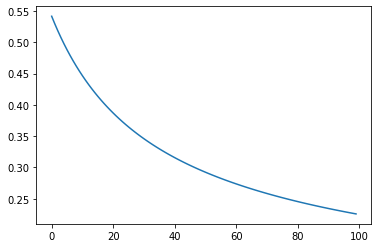

In [224]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 0) prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

#sacle
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#prepare data for pytorch
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

# 1) model
# f = wx + b, sigmoid at the end
class MylogisticRegression(nn.Module):
    def __init__(self, input_features):
        super(MylogisticRegression, self).__init__()
        self.Linear = nn.Linear(input_features, 1)
        
    def forward(self, x):
        y_predicted = torch.sigmoid(self.Linear(x))
        return y_predicted

model = MylogisticRegression(input_features=n_features)
        
# 2) loss and optimizer
loss = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) training loop
n_iters = 100
training_loss = []
for epoch in range(n_iters):
    y_pred = model(X_train)
    l = loss(y_pred, y_train)
    
    l.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    training_loss.append(l.item())
    
plt.plot(training_loss)

In [225]:
# 4)evaluation

with torch.no_grad():
    pred = model(X_test)
    pred_cls = pred.round()
    acc = pred_cls.eq(y_test).sum() / float(y_test.shape[0])
    print("accuracy:", acc)

accuracy: tensor(0.9211)


### Using dataloader with Pytorch

In [11]:
# get the data from https://github.com/python-engineer/pytorchTutorial

import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):
    def __init__(self):
        #loading data
        xy = np.loadtxt("/Users/fahimehb/Documents/GNN/dat/wine/wine.csv", 
                        delimiter=",", 
                        dtype=np.float32, 
                        skiprows=1)
        
        self.x = torch.from_numpy(xy[:, 1:])
        self.y = torch.from_numpy(xy[:, [0]]) #n_samples, 1
        self.n_samples = xy.shape[0]
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
        
    def __len__(self):
        return self.n_samples 
    

dataset = WineDataset()
first_data = dataset[0]
features, labels = first_data
print(features, labels)

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])


In [8]:
pd.read_csv("/Users/fahimehb/Documents/GNN/dat/wine/wine.csv")

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [18]:
batchsize=4
dataloader = DataLoader(dataset=dataset, batch_size=batchsize, shuffle=True, num_workers=2)
dataiter = iter(dataloader)
data = dataiter.next()
features, labels = data
print(features, labels)
#since we have a batchsize 4, we will see the following

tensor([[1.2470e+01, 1.5200e+00, 2.2000e+00, 1.9000e+01, 1.6200e+02, 2.5000e+00,
         2.2700e+00, 3.2000e-01, 3.2800e+00, 2.6000e+00, 1.1600e+00, 2.6300e+00,
         9.3700e+02],
        [1.1450e+01, 2.4000e+00, 2.4200e+00, 2.0000e+01, 9.6000e+01, 2.9000e+00,
         2.7900e+00, 3.2000e-01, 1.8300e+00, 3.2500e+00, 8.0000e-01, 3.3900e+00,
         6.2500e+02],
        [1.3200e+01, 1.7800e+00, 2.1400e+00, 1.1200e+01, 1.0000e+02, 2.6500e+00,
         2.7600e+00, 2.6000e-01, 1.2800e+00, 4.3800e+00, 1.0500e+00, 3.4000e+00,
         1.0500e+03],
        [1.3730e+01, 4.3600e+00, 2.2600e+00, 2.2500e+01, 8.8000e+01, 1.2800e+00,
         4.7000e-01, 5.2000e-01, 1.1500e+00, 6.6200e+00, 7.8000e-01, 1.7500e+00,
         5.2000e+02]]) tensor([[2.],
        [2.],
        [1.],
        [3.]])


In [32]:
#training loop
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/batchsize) #number of iterations in each epoch
print(total_samples, n_iterations)

for epoch in range(num_epochs):
    for i, (inputs, label) in enumerate(dataloader):
        #forward, backward, update gradient
        if (i+1) % 5 == 0 :
            print(f'epoch:{epoch+1}/{num_epochs}, step:{i+1}/{n_iterations}, inputs:{inputs.shape}',)

178 45
epoch:1/2, step:5/45, inputs:torch.Size([4, 13])
epoch:1/2, step:10/45, inputs:torch.Size([4, 13])
epoch:1/2, step:15/45, inputs:torch.Size([4, 13])
epoch:1/2, step:20/45, inputs:torch.Size([4, 13])
epoch:1/2, step:25/45, inputs:torch.Size([4, 13])
epoch:1/2, step:30/45, inputs:torch.Size([4, 13])
epoch:1/2, step:35/45, inputs:torch.Size([4, 13])
epoch:1/2, step:40/45, inputs:torch.Size([4, 13])
epoch:1/2, step:45/45, inputs:torch.Size([2, 13])
epoch:2/2, step:5/45, inputs:torch.Size([4, 13])
epoch:2/2, step:10/45, inputs:torch.Size([4, 13])
epoch:2/2, step:15/45, inputs:torch.Size([4, 13])
epoch:2/2, step:20/45, inputs:torch.Size([4, 13])
epoch:2/2, step:25/45, inputs:torch.Size([4, 13])
epoch:2/2, step:30/45, inputs:torch.Size([4, 13])
epoch:2/2, step:35/45, inputs:torch.Size([4, 13])
epoch:2/2, step:40/45, inputs:torch.Size([4, 13])
epoch:2/2, step:45/45, inputs:torch.Size([2, 13])


### Using transform with Pytorch

In [41]:
class WineDataset(Dataset):
    def __init__(self, transform=None):
        #loading data
        xy = np.loadtxt("/Users/fahimehb/Documents/GNN/dat/wine/wine.csv", 
                        delimiter=",", 
                        dtype=np.float32, 
                        skiprows=1)
        
        self.x = xy[:, 1:]
        self.y = xy[:, [0]] #n_samples, 1
        
        self.transform = transform
        
    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        if self.transform:
            sample = self.transform(sample)
        return sample
        
    def __len__(self):
        return self.n_samples 
    

# lets implement a transform
class ToTensor:
    def __call__(self, sample):
        inputs, target = sample
        return torch.from_numpy(inputs), torch.from_numpy(target)
    
class MulTransform:
    def __init__(self, factor):
        self.factor = factor
        
    def __call__(self, sample):
        inputs, target = sample
        inputs *= self.factor
        return inputs, target
        

In [38]:
dataset= WineDataset(transform=ToTensor())
dataset[0]

(tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
         3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
         1.0650e+03]), tensor([1.]))

In [40]:
dataset= WineDataset(transform=None)
dataset[0]

(array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03], dtype=float32), array([1.], dtype=float32))

In [47]:
composed = torchvision.transforms.Compose([ToTensor(), MulTransform(2)])
dataset = WineDataset(transform=composed)
dataset[0]

(tensor([2.8460e+01, 3.4200e+00, 4.8600e+00, 3.1200e+01, 2.5400e+02, 5.6000e+00,
         6.1200e+00, 5.6000e-01, 4.5800e+00, 1.1280e+01, 2.0800e+00, 7.8400e+00,
         2.1300e+03]), tensor([1.]))

### Softmax and Cross-Entropy

In [58]:
def Mysoftmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

In [62]:
x = np.array([2., 1., 0.1])
output = Mysoftmax(x)
print("softmax numpy:", output)
x = torch.tensor([2., 1., 0.1])
torch.softmax(x, dim=0)

softmax numpy: [0.65900114 0.24243297 0.09856589]


tensor([0.6590, 0.2424, 0.0986])

In [68]:
def MyCrossEntropy(actual, predicted):
    return -np.sum(actual * np.log(predicted)) #We did not normalize it here

In [71]:
Y = np.array([1, 0, 0])

y_pred_good = np.array([0.7, 0.2, 0.1]) #softmax applied
y_pred_bad = np.array([0.1, 0.3, 0.6]) #softmax applied

l1 = MyCrossEntropy(Y, y_pred_good)
l2 = MyCrossEntropy(Y, y_pred_bad)

print(f'Loss 1:{l1:.4f}')
print(f'Loss 2:{l2:.4f}')

Loss 1:0.3567
Loss 2:2.3026


In [80]:
import torch.nn as nn
loss = nn.CrossEntropyLoss()

#### For only one sample

In [84]:
Y = torch.tensor([0])# Y is not anymore one hot, it is the label
# n_sample x nclasses

Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]]) #must not have softmax
Y_pred_bad = torch.tensor([[.5, 2., 0.3]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(f'Loss 1:{l1.item():.4f}')
print(f'Loss 2:{l2.item():.4f}')

Loss 1:0.4170
Loss 2:1.8406


In [103]:
_, prediction1 = torch.max(Y_pred_good, dim=1)
_, prediction2 = torch.max(Y_pred_bad, dim=1)

print(prediction1, prediction2)

tensor([0]) tensor([1])


#### For 3 samples

In [107]:
Y = torch.tensor([2, 0, 1]) 

Y_pred_good = torch.tensor([[0.1, 1.0, 2.1], [2.0, 0.1, 0.5], [0.1, 2., 0.5]])
Y_pred_bad = torch.tensor([[2., 0.5, .1], [0.1, 1.0, 2.1], [3.0, 1.0, 0.1]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(f'Loss 1:{l1.item():.4f}')
print(f'Loss 2:{l2.item():.4f}')

_, prediction1 = torch.max(Y_pred_good, dim=1)
_, prediction2 = torch.max(Y_pred_bad, dim=1)

print(prediction1, prediction2)

Loss 1:0.3392
Loss 2:2.2584
tensor([2, 0, 1]) tensor([0, 2, 0])


### MNIST pytorch deep learning

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyperparameter
input_size = 784 #28x28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, 
                                           transform=transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root="./data", train=False, 
                                           transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)



torch.Size([100, 1, 28, 28]) torch.Size([100])


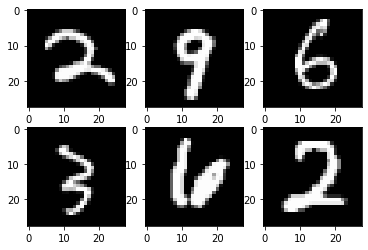

In [2]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap='gray')
    
plt.show()

In [8]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out
        

model = NeuralNet(input_size, hidden_size, num_classes)

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # shape of data 100 x 1 x 28 x 28
        # we have to make it 100 x 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        y_pred = model(images)
        loss = criterion(y_pred, labels)
        
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'epoch: {epoch+1}/{num_epochs}, steps:{i+1}/{n_total_steps}, loss:{loss.item():.4f}')
            
    
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct = (predictions == labels).sum().item()
acc = 100 * n_correct / n_samples
print(f'accuracy:{acc}')

epoch: 1/2, steps:100/600, loss:0.4618
epoch: 1/2, steps:200/600, loss:0.3161
epoch: 1/2, steps:300/600, loss:0.3195
epoch: 1/2, steps:400/600, loss:0.4161
epoch: 1/2, steps:500/600, loss:0.3166
epoch: 1/2, steps:600/600, loss:0.2503
epoch: 2/2, steps:100/600, loss:0.1495
epoch: 2/2, steps:200/600, loss:0.3153
epoch: 2/2, steps:300/600, loss:0.1372
epoch: 2/2, steps:400/600, loss:0.2075
epoch: 2/2, steps:500/600, loss:0.1383
epoch: 2/2, steps:600/600, loss:0.2236
accuracy:0.93


In [ ]:
model(images)